In [93]:
import pandas as pd
import numpy as np
all_data = pd.read_csv('dataset_group.csv',header=None)
#В файле нет строки с названием столбцов, поэтому параметр header равен None.
#Интерес представляет информация об id покупателя - столбец с названием 1
#Название купленного товара хранится в столбце с названием 2

In [94]:
unique_id = list(set(all_data[1]))
print(len(unique_id)) #Выведем количество id

1139


In [95]:
items = list(set(all_data[2]))
print(len(items)) #Выведем количество товаров

38


In [96]:
dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in items] for id in unique_id]

In [97]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [98]:
print(df)

      all- purpose  aluminum foil  bagels   beef  butter  cereals  cheeses  \
0             True           True   False   True    True    False    False   
1            False           True   False  False   False     True     True   
2            False          False    True  False   False     True     True   
3             True          False   False  False   False     True    False   
4             True          False   False  False   False    False    False   
...            ...            ...     ...    ...     ...      ...      ...   
1134          True          False   False   True   False     True     True   
1135         False          False   False  False   False     True     True   
1136         False          False    True   True   False    False    False   
1137          True          False   False   True   False    False     True   
1138         False          False   False  False   False    False    False   

      coffee/tea  dinner rolls  dishwashing liquid/detergent  .

**Ассоциативный анализ**

In [110]:
from mlxtend.frequent_patterns import apriori
results = apriori(df, min_support=0.1, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) #добавление размера набора
print(results)

       support                             itemsets  length
0     0.374890                       (all- purpose)       1
1     0.384548                      (aluminum foil)       1
2     0.385426                             (bagels)       1
3     0.374890                               (beef)       1
4     0.367867                             (butter)       1
...        ...                                  ...     ...
1401  0.135206  (toilet paper, waffles, vegetables)       3
1402  0.130817   (toilet paper, yogurt, vegetables)       3
1403  0.121159     (waffles, vegetables, tortillas)       3
1404  0.130817      (yogurt, vegetables, tortillas)       3
1405  0.146620        (yogurt, waffles, vegetables)       3

[1406 rows x 3 columns]


itemset - набор продуктов, которые купил покупатель

support - частота появления itemset'a в dataset'e

length - длина itemset'a


In [100]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
print(results)

     support                        itemsets
0   0.374890                  (all- purpose)
1   0.384548                 (aluminum foil)
2   0.385426                        (bagels)
3   0.374890                          (beef)
4   0.367867                        (butter)
5   0.395961                       (cereals)
6   0.390694                       (cheeses)
7   0.379280                    (coffee/tea)
8   0.388938                  (dinner rolls)
9   0.388060  (dishwashing liquid/detergent)
10  0.389816                          (eggs)
11  0.352941                         (flour)
12  0.370500                        (fruits)
13  0.345917                     (hand soap)
14  0.398595                     (ice cream)
15  0.375768              (individual meals)
16  0.376646                         (juice)
17  0.371378                       (ketchup)
18  0.378402             (laundry detergent)
19  0.395083                    (lunch meat)
20  0.380158                          (milk)
21  0.3757

In [101]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(results)
print('\nCount of result itemsets =',len(results))

     support                                    itemsets  length
38  0.310799                 (aluminum foil, vegetables)       2
39  0.300263                        (bagels, vegetables)       2
40  0.310799                       (cereals, vegetables)       2
41  0.309043                       (cheeses, vegetables)       2
42  0.308165                  (dinner rolls, vegetables)       2
43  0.306409  (vegetables, dishwashing liquid/detergent)       2
44  0.326602                          (eggs, vegetables)       2
45  0.302897                     (ice cream, vegetables)       2
46  0.309043             (laundry detergent, vegetables)       2
47  0.311677                    (lunch meat, vegetables)       2
48  0.331870                       (poultry, vegetables)       2
49  0.305531                          (soda, vegetables)       2
50  0.315189                       (waffles, vegetables)       2
51  0.319579                        (yogurt, vegetables)       2

Count of result itemsets

Пороговое значение для размера 2: 0.34
Пороговое значение для размера 3: 0.17000000000000004


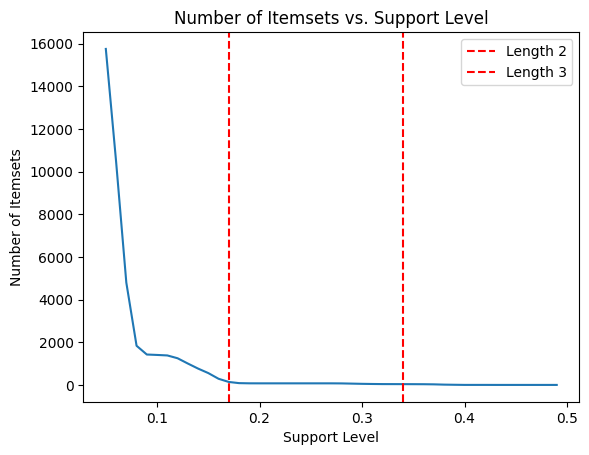

In [102]:
support_levels = np.arange(0.05, 0.5, 0.01)
support_thresholds = {}

for length in range(2, 4):  # Проверяем только размеры 1, 2, 3
    support_thresholds[length] = None  # Инициализируем пороговые значения как None

for support in support_levels:
    results = apriori(df, min_support=support, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))

    for length in range(2, 4):
        if support_thresholds[length] is None:  # Если пороговое значение еще не найдено
            if len(results[results['length'] == length]) == 0:  # Если наборы данного размера пропали
                support_thresholds[length] = support  # Сохраняем текущий уровень поддержки как пороговый

# Выводим пороговые значения
for length in range(2, 4):
    print(f"Пороговое значение для размера {length}: {support_thresholds.get(length)}")
plt.plot(support_levels, itemset_counts)
plt.xlabel('Support Level')
plt.ylabel('Number of Itemsets')
plt.title('Number of Itemsets vs. Support Level')

for length, threshold in support_thresholds.items():
    plt.axvline(x=threshold, color='r', linestyle='--', label=f'Length {length}')

plt.legend()
plt.show()


In [103]:
# 6
results_038 = apriori(df, min_support=0.38, use_colnames=True)
results_038['length'] = results_038['itemsets'].apply(lambda x: len(x))
items_size_1 = results_038[results_038['length'] == 1]['itemsets'].apply(list).tolist()

new_dataset = []
for transaction in dataset:
    new_transaction = []
    for item in transaction:
        if [item] in items_size_1:
            new_transaction.append(item)
    if new_transaction:  # Include non-empty transactions
        new_dataset.append(new_transaction)
# 7
from mlxtend.preprocessing import TransactionEncoder

te_new = TransactionEncoder()
te_ary_new = te_new.fit(new_dataset).transform(new_dataset)
df_new = pd.DataFrame(te_ary_new, columns=te_new.columns_)
# 8
results_new_03 = apriori(df_new, min_support=0.3, use_colnames=True)
print("Apriori analysis results for the new dataset (support=0.3):\n", results_new_03)


Apriori analysis results for the new dataset (support=0.3):
      support                                    itemsets
0   0.385903                             (aluminum foil)
1   0.386784                                    (bagels)
2   0.397357                                   (cereals)
3   0.392070                                   (cheeses)
4   0.390308                              (dinner rolls)
5   0.389427              (dishwashing liquid/detergent)
6   0.391189                                      (eggs)
7   0.400000                                 (ice cream)
8   0.396476                                (lunch meat)
9   0.381498                                      (milk)
10  0.422907                                   (poultry)
11  0.392070                                      (soda)
12  0.741850                                (vegetables)
13  0.395595                                   (waffles)
14  0.385903                                    (yogurt)
15  0.311894               

По сравнению с исходным набором данных, новый набор данных, скорее всего, будет иметь меньше наборов элементов, так как он включает только часто встречающиеся элементы. Значения поддержки для оставшихся наборов элементов могут быть выше в новом наборе данных. Вам необходимо сравнить результаты с предыдущим анализом, чтобы выявить конкретные сходства и различия.

In [104]:
results_new_015 = apriori(df_new, min_support=0.15, use_colnames=True)
results_new_015['length'] = results_new_015['itemsets'].apply(lambda x: len(x))
filtered_results = results_new_015[
    (results_new_015['length'] > 1) &
    (results_new_015['itemsets'].apply(lambda x: 'yogurt' in x or 'waffles' in x))
]
print("Filtered results (support=0.15, length > 1, 'yogurt' or 'waffles'):\n", filtered_results)

Filtered results (support=0.15, length > 1, 'yogurt' or 'waffles'):
       support                                 itemsets  length
27   0.170044                 (waffles, aluminum foil)       2
28   0.177974                  (yogurt, aluminum foil)       2
40   0.160352                        (waffles, bagels)       2
41   0.162996                         (yogurt, bagels)       2
52   0.161233                       (waffles, cereals)       2
53   0.172687                        (yogurt, cereals)       2
63   0.173568                       (waffles, cheeses)       2
64   0.172687                        (yogurt, cheeses)       2
73   0.170044                  (waffles, dinner rolls)       2
74   0.167401                   (yogurt, dinner rolls)       2
82   0.176211  (waffles, dishwashing liquid/detergent)       2
83   0.158590   (yogurt, dishwashing liquid/detergent)       2
90   0.170044                          (waffles, eggs)       2
91   0.175330                           (yogurt, 

In [105]:
excluded_items = set(items) - set(te_new.columns_)
excluded_dataset = [[item for item in transaction if item in excluded_items] for transaction in dataset]
excluded_dataset = [transaction for transaction in excluded_dataset if transaction] # remove empty transactions

te_excluded = TransactionEncoder()
te_ary_excluded = te_excluded.fit(excluded_dataset).transform(excluded_dataset)
df_excluded = pd.DataFrame(te_ary_excluded, columns=te_excluded.columns_)

results_excluded = apriori(df_excluded, min_support=0.1, use_colnames=True) # adjust min_support as needed
print("Apriori analysis results for the excluded dataset:\n", results_excluded)

Apriori analysis results for the excluded dataset:
       support                         itemsets
0    0.374890                   (all- purpose)
1    0.374890                           (beef)
2    0.367867                         (butter)
3    0.379280                     (coffee/tea)
4    0.352941                          (flour)
..        ...                              ...
271  0.151888  (toilet paper, spaghetti sauce)
272  0.148376     (spaghetti sauce, tortillas)
273  0.151888            (toilet paper, sugar)
274  0.147498               (sugar, tortillas)
275  0.156277        (toilet paper, tortillas)

[276 rows x 2 columns]


In [112]:
filtered_results_s = results[results['itemsets'].apply(lambda x: sum(1 for item in x if item.startswith('s')) >= 2)]
print("Filtered results (at least two elements starting with 's'):\n", filtered_results_s)

Filtered results (at least two elements starting with 's'):
        support                                        itemsets  length
675   0.137840                (sandwich loaves, sandwich bags)       2
676   0.146620                        (shampoo, sandwich bags)       2
677   0.158911                           (sandwich bags, soap)       2
678   0.162423                           (soda, sandwich bags)       2
679   0.147498                (spaghetti sauce, sandwich bags)       2
680   0.131694                          (sugar, sandwich bags)       2
686   0.150132                      (sandwich loaves, shampoo)       2
687   0.158033                         (sandwich loaves, soap)       2
688   0.141352                         (sandwich loaves, soda)       2
689   0.150132              (sandwich loaves, spaghetti sauce)       2
690   0.136962                        (sandwich loaves, sugar)       2
696   0.151010                                 (shampoo, soap)       2
697   0.150132  

In [111]:
filtered_results_support = results[(results['support'] >= 0.1) & (results['support'] <= 0.25)]
print("Filtered results (support between 0.1 and 0.25):\n", filtered_results_support)

Filtered results (support between 0.1 and 0.25):
        support                             itemsets  length
38    0.157155        (all- purpose, aluminum foil)       2
39    0.150132               (all- purpose, bagels)       2
40    0.144864                 (all- purpose, beef)       2
41    0.147498               (all- purpose, butter)       2
42    0.151010              (all- purpose, cereals)       2
...        ...                                  ...     ...
1401  0.135206  (toilet paper, waffles, vegetables)       3
1402  0.130817   (toilet paper, yogurt, vegetables)       3
1403  0.121159     (waffles, vegetables, tortillas)       3
1404  0.130817      (yogurt, vegetables, tortillas)       3
1405  0.146620        (yogurt, waffles, vegetables)       3

[1331 rows x 3 columns]
